# Emax vs $\alpha$

In [1]:
# imports
from importlib import reload
import numpy as np

from matplotlib import pyplot as plt

from zdm.craco import loading

from zdm import iteration as it
from zdm import io

import figs_zdm_H0_I

/data/Projects/FRB_Software/FRB/frb/halos/hmf.py:51: UserWarning: hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..
  warnings.warn("hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..")


# Load

In [2]:
cube_out = np.load('../Analysis/Cubes/craco_alpha_Emax_cube.npz')
#cube_out = np.load('../Analysis/Cubes/craco_submini_cube.npz')  # Only for a bit of testing

In [3]:
ll = cube_out['ll']

# Fuss a bit

In [4]:
ll[np.isnan(ll)] = -1e99

In [5]:
ll.max()

-568.63

In [7]:
lEmax = cube_out['lEmax']
alpha = cube_out['alpha']
#
dE = lEmax[1]-lEmax[0]
dalpha = alpha[1] - alpha[0]

In [8]:
ll -= ll.max()

In [9]:
lEmax.min(), lEmax.max()

(40.5, 42.5)

In [10]:
alpha.min(), alpha.max()

(0.2, 4.0)

# Plot

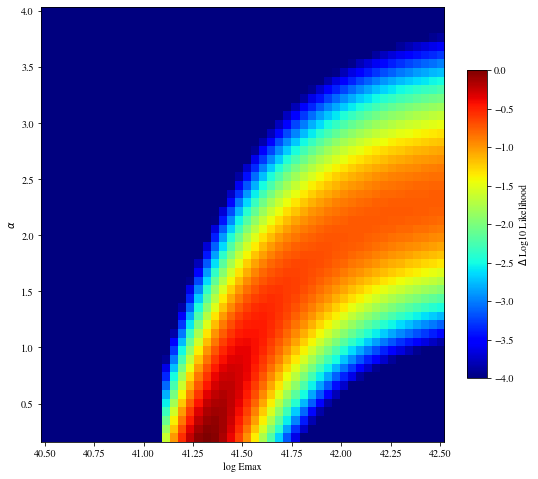

In [12]:
plt.figure(figsize=(8,8))
plt.clf()
ax = plt.gca()

im=plt.imshow(ll.T,cmap='jet',origin='lower', 
                  interpolation='None', extent=[lEmax.min()-dE/2, lEmax.max()+dE/2, alpha.min()-dalpha/2, alpha.max()+dalpha/2],
              aspect='auto', vmin=-4.
             )#aspect=aspect)
# Color bar
cbar=plt.colorbar(im,fraction=0.046, shrink=1.2,aspect=15,pad=0.05)
cbar.set_label(r'$\Delta$ Log10 Likelihood')
#
ax.set_xlabel('log Emax')
ax.set_ylabel(r'$\alpha$')
plt.savefig('fig_alpha_vs_Emax.png', dpi=200)
plt.show()

----